In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [425]:
logpath = '../neuron_logs/output_zs_20190611-172257.json'



In [426]:
with open(logpath) as f:
    results = json.load(f)
    
results = dict([(int(it), np.array(nda)) for it, nda in list(results.items())])

In [427]:
LAYERS, IMAGES, WIDTH = results[0].shape
EPOCHS = len(results)
results[0].shape

(4, 10000, 30)

In [428]:
results[0][2,200,13]

-0.13895532488822937

In [429]:
def select_neuron(data_dict, loc, img):
    activations = []
    for it in sorted(list(data_dict.keys())):
        activations += [data_dict[it][loc[0],img,loc[1]]]
    return(np.array(activations))



def converges(array):

    zeros = (np.argwhere(array < 0).flatten())
    #print(zeros)
    if len(zeros) == 0: # if exists
        return(EPOCHS)
    else:
        if zeros[-1] != EPOCHS-1: # if not zero terminated
            return(EPOCHS)
        else:
            if len(zeros) == 1: 
                return(EPOCHS-1) # if the last one is zero
            else:
                previous = EPOCHS - 1
                #print('YISS')
                for i in zeros[:-1][::-1]: # reverse
                    if previous - i != 1:
                        return(previous)
                    else:
                        previous = i
                return(zeros[0])
        

In [439]:
# this shows if and when a certain neuron zeroed for a certain image after some epochs
loc = (2, 3)
# shift-enter
dipping = []
for img in range(IMAGES):
    dipping += [converges(select_neuron(results, loc, img))]

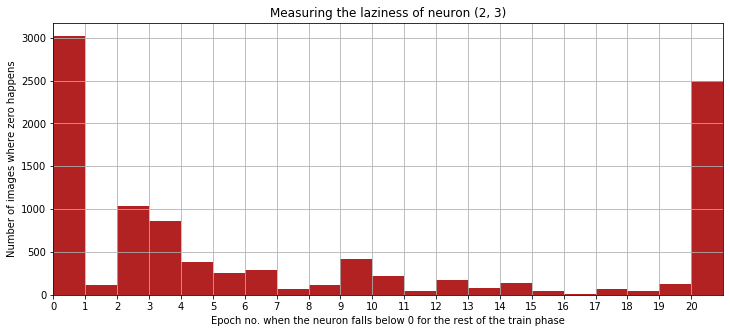

In [440]:
plt.figure(figsize=(12,5), facecolor = 'w')
plt.hist(dipping, bins = range(EPOCHS+1), color = 'firebrick')
plt.title(f'Measuring the laziness of neuron {loc}')
plt.xlabel('Epoch no. when the neuron falls below 0 for the rest of the train phase')
plt.ylabel('Number of images where zero happens')
plt.xlim((0, EPOCHS))
plt.xticks(range(0, EPOCHS, 1))
plt.grid()

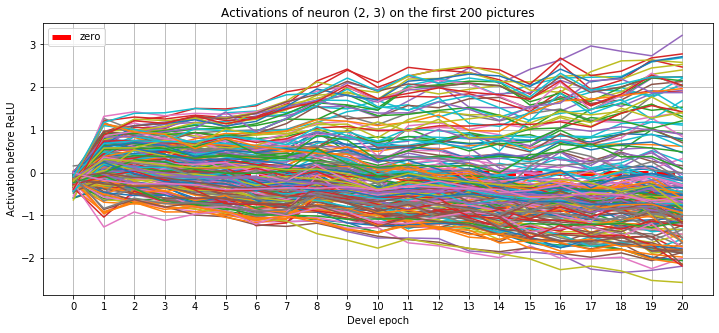

In [441]:
plt.figure(figsize=(12,5), facecolor='w')
num_of_images = 200
plt.plot([0, len(results)-1], [0,0], '--', color = 'red', linewidth=5, label = 'zero')
for i in range(num_of_images): # iterating on images
    #loc = (3,13)
    example_activations = select_neuron(results, loc, i)
    plt.plot(range(len(example_activations)), example_activations, '-')

    
plt.title(f'Activations of neuron {loc} on the first {num_of_images} pictures')
plt.legend()
plt.xlabel('Devel epoch')
plt.ylabel('Activation before ReLU')
plt.xticks(range(EPOCHS))
plt.grid()


In [ ]:
for i in range(LAYERS):
    for j in range(WIDTH):
        loc = (2, 3)
        dipping = []
        for img in range(IMAGES):
            dipping += [converges(select_neuron(results, loc, img))]
            
        plt.figure(figsize=(12,5), facecolor = 'w')
        plt.hist(dipping, bins = range(EPOCHS+1), color = 'firebrick')
        plt.title(f'Measuring the laziness of neuron {loc}')
        plt.xlabel('Epoch no. when the neuron falls below 0 for the rest of the train phase')
        plt.ylabel('Number of images where zero happens')
        plt.xlim((0, EPOCHS))
        plt.xticks(range(0, EPOCHS, 1))
        plt.grid()

        plt.figure(figsize=(12,5), facecolor='w')
        num_of_images = 200
        plt.plot([0, len(results)-1], [0,0], '--', color = 'red', linewidth=5, label = 'zero')
        for i in range(num_of_images): # iterating on images
            #loc = (3,13)
            example_activations = select_neuron(results, loc, i)
            plt.plot(range(len(example_activations)), example_activations, '-')


        plt.title(f'Activations of neuron {loc} on the first {num_of_images} pictures')
        plt.legend()
        plt.xlabel('Devel epoch')
        plt.ylabel('Activation before ReLU')
        plt.xticks(range(EPOCHS))
        plt.grid()
